In [1]:
 import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 10)

%matplotlib inline

In [2]:
# Plotting Bounding Box

In [6]:
def plot_bounding_box(dbox_data):
    """
    Plot bounding boxes

    dbox_data (tensor): a tensor of bounding boxes.
                        Format: [
                            [x_min, y_min, x_max, y_max, ...],
                            [x_min, y_min, x_max, y_max, ...],
                            ...
                        ]
    """

    width = dbox_data[:, 2] - dbox_data[:, 0] + 1
    height = dbox_data[:, 3] - dbox_data[:, 1] + 1

    color = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111, aspect='equal')

    for i in range(tf.shape(dbox_data)[0]):
        ax.add_patch(
            patches.Rectangle(
                (dbox_data[i, 0], dbox_data[i, 1]),
                width[i],
                height[i],
                fill=False,
                color=color[i%len(color)],
                linewidth=3,
                label='{}'.format(i)
            )
        )

    ax.legend()

    plt.xticks(range(0, 1050, 50))
    plt.yticks(range(0, 1050, 50))
    plt.gca().axis('tight')
    plt.gca().invert_yaxis()

    plt.show()

    return


In [7]:
# Bounding boxes / detections.
detections = tf.convert_to_tensor(
    [
        [100, 100, 500, 600],
        [150, 320, 570, 620],
        [50,  150, 450, 800],
        [550, 300, 900, 500],
    ],
    dtype=tf.float32,
)

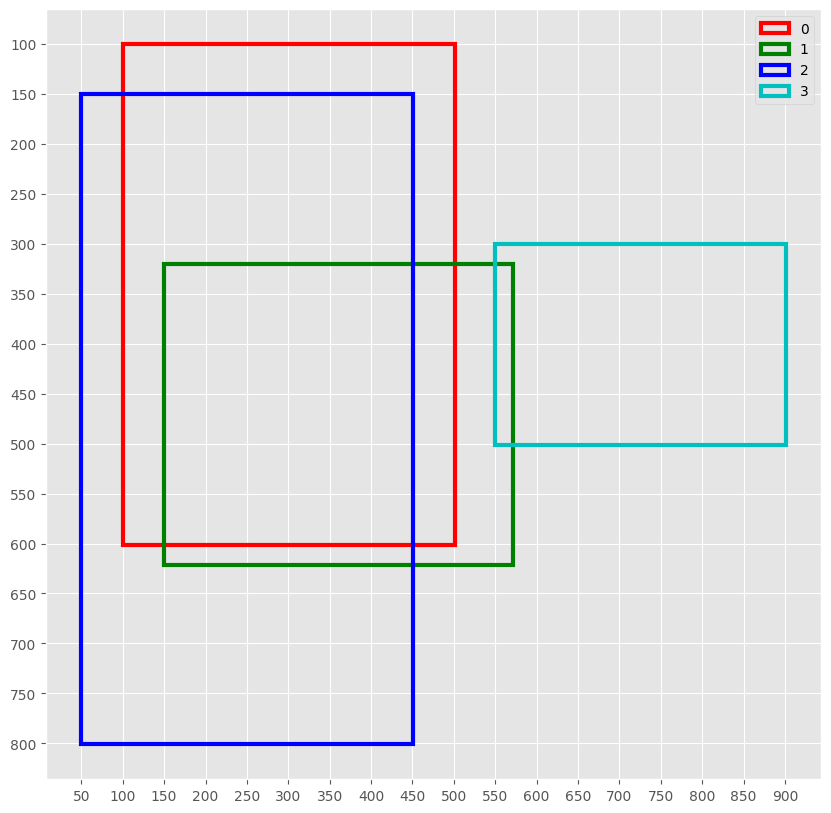

In [8]:
plot_bounding_box(detections)

In [9]:
# Computing IoU

In [10]:
def intersection_over_union(dbox_data, area=None):
    """
    Calculates IoU of the 0th indexed bounding box with the rest of the boxes ([1:]).

    Args:
        dbox_data (tensor): bounding boxes.
                    Format: [
                                [x_min, y_min, x_max, y_max, ...],
                                [x_min, y_min, x_max, y_max, ...],
                                         :
                                         :
                                [x_min, y_min, x_max, y_max, ...],
                            ]

        area: Area of the bounding boxes. Default: None.
              If area is None, the function calculates the area and use it.
              Foramt: [area_of_bounding_box_1, area_of_bounding_box_2, ....]

    Returns:
        (tensor): IoU of the 0th indexed bounding box with the rest of the boxes. Length will be one less than
                     the number of bounding box.
    """

    # Calculate area if not provided.
    if area is None:

        # Calculate width and height.
        width = dbox_data[:, 2] - dbox_data[:, 0] + 1
        height = dbox_data[:, 3] - dbox_data[:, 1] + 1

        area = tf.multiply(width, height)

    # Identify the overlap box coordinates.
    x_min = tf.math.maximum(dbox_data[0, 0], dbox_data[1:, 0])
    y_min = tf.math.maximum(dbox_data[0, 1], dbox_data[1:, 1])
    x_max = tf.math.minimum(dbox_data[0, 2], dbox_data[1:, 2])
    y_max = tf.math.minimum(dbox_data[0, 3], dbox_data[1:, 3])

    # Calculate width and height of overlapped regions and suppress negative values.
    intersection_width  = tf.math.maximum((x_max - x_min + 1), 0.0)
    intersection_height = tf.math.maximum((y_max - y_min + 1), 0.0)

    # IoU calculation.
    intersection_area = intersection_width * intersection_height
    iou = intersection_area / (area[0] + area[1:] - intersection_area)

    return iou

In [11]:
# Use the above detections to calculate IoU.

iou = intersection_over_union(detections)
print(f"IoU: {iou}")

IoU: [0.43071997 0.52132547 0.        ]


In [12]:
# Computing Overlap

In [13]:
def overlap(dbox_data):

    # Identify the overlap box coordinates.
    x_min = tf.math.maximum(dbox_data[0, 0], dbox_data[1:, 0])
    y_min = tf.math.maximum(dbox_data[0, 1], dbox_data[1:, 1])
    x_max = tf.math.minimum(dbox_data[0, 2], dbox_data[1:, 2])
    y_max = tf.math.minimum(dbox_data[0, 3], dbox_data[1:, 3])

    # Calculate width and height of overlapped regions and suppress negative values.
    intersection_width = tf.math.maximum((x_max - x_min + 1), 0.0)
    intersection_height = tf.math.maximum((y_max - y_min + 1), 0.0)

    # Calculate area of overlapped regions.
    intersection_area = intersection_width * intersection_height

    # Calculate total area occupied between all pairs.
    area_ref = (dbox_data[0, 2] - dbox_data[0, 0] + 1.) * (dbox_data[0, 3] - dbox_data[0, 1] + 1.)

    # Calculate overlap.
    overlap = intersection_area / area_ref

    return overlap

In [14]:
overlap_size = overlap(detections)

print(f"Total overlap: {overlap_size}")

Total overlap: [0.4909433 0.7879553 0.       ]
